# Pymaceuticals Inc.
---

### Analysis

The Drug Infubinol had the most outliers of tumor sizes compared to all other drugs.

Capomulin had positve results in reducing tumor sizes when exposed to long periods of use

However, though the tumor got smaller in size the weight went up. Implying that the campomulin increases the density of the tumors
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_pd = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merged_pd.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
merged_pd["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duped_id = merged_pd.loc[merged_pd.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duped_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_pd.loc[merged_pd["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_pd = merged_pd.loc[merged_pd["Mouse ID"] != "g989"]
cleaned_pd

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_pd["Mouse ID"].nunique()

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_pd = merged_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean = drug_regimen_pd.mean()
median = drug_regimen_pd.median()
var = drug_regimen_pd.var()
std_dev = drug_regimen_pd.std()
std_err = drug_regimen_pd.sem()





# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_pd = pd.DataFrame({"Mean Tumor Volume" : mean, "Median Tumor Volume" : median, "Tumor Volume Variance" : var,
                          "Tumor Volume Std. Dev." : std_dev, "Tumor Volume Std. Err." : std_err})


summary_pd

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)



# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = merged_pd.groupby("Drug Regimen").agg({'Tumor Volume (mm3)' : ['mean',"median","var","std","sem"]})
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

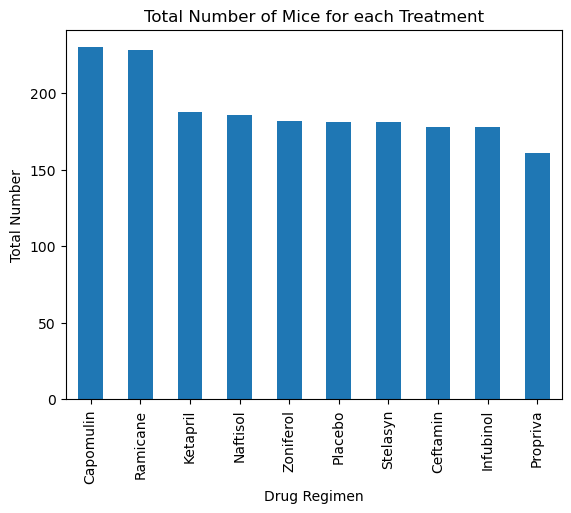

In [172]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_data = merged_pd.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
panda_plot = plot_data.plot(kind = "bar")
plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number")
plt.show()

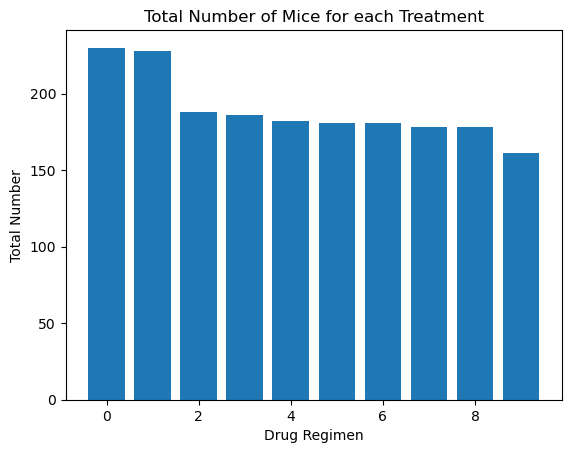

In [173]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = range(0,merged_pd["Drug Regimen"].nunique())
plt.bar(x_axis,plot_data)
plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number")
plt.show()

<Axes: ylabel='count'>

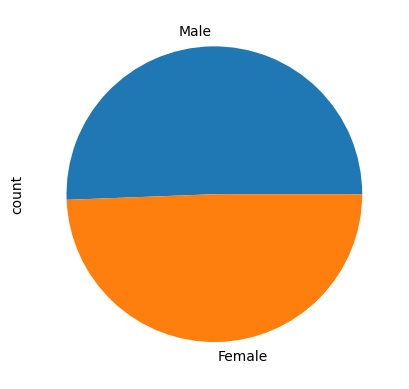

In [209]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plot_data = merged_pd["Sex"].value_counts()
plot_data.plot(kind = "pie")

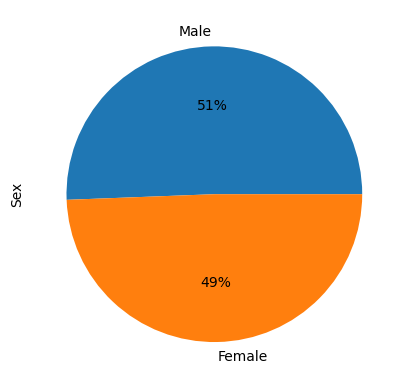

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: count, dtype: int64

In [207]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(plot_data, labels = ["Male", "Female"],autopct='%1.0f%%')
plt.ylabel("Sex")
plt.show()
merged_pd["Drug Regimen"].value_counts()

## Quartiles, Outliers and Boxplots

In [161]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse
final_df = final_df.sort_values(["Timepoint"], ascending = False)

                    
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merged_df = final_df.merge(merged_pd, on = ("Mouse ID", 'Timepoint'), how = "left")

                    

In [164]:
# Put treatments into a list for for loop (and later for plot labels)


regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


    

# Create empty list to fill with tumor vol data (for plotting)


tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in regimens:
    regimen = final_merged_df.loc[final_merged_df["Drug Regimen_x"] == i,:]["Tumor Volume (mm3)_x"]
    
    
    quartiles = regimen.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_boundary = lower_quartile - 1.5*iqr
    upper_boundary = upper_quartile + 1.5*iqr
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    outliers = regimen.loc[(regimen < lower_boundary) | (regimen > upper_boundary)]
    # Determine outliers using upper and lower bounds
    tumor_vol_data.append(outliers)
    

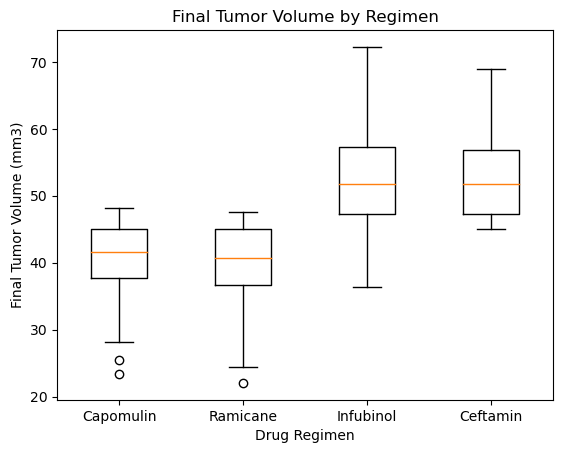

In [165]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_vol_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
#plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin, l509')

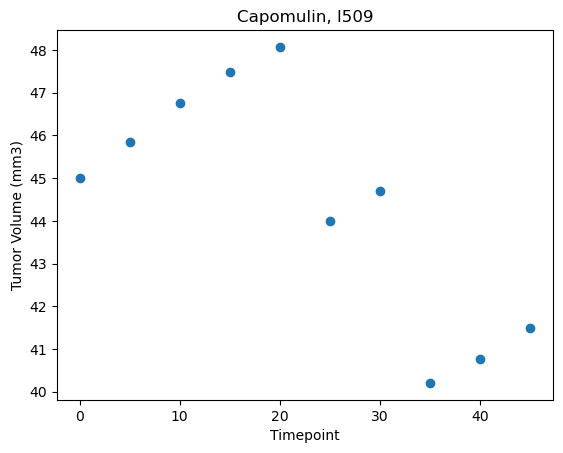

In [175]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

drug = merged_pd.loc[merged_pd["Drug Regimen"] == "Capomulin"]
x_axis = drug.loc[drug['Mouse ID'] == "l509"]["Timepoint"]
y_axis = drug.loc[drug['Mouse ID'] == "l509"]["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin, l509")

Text(0.5, 1.0, 'Mouse Weight vs. Average Observed Tumor Volume')

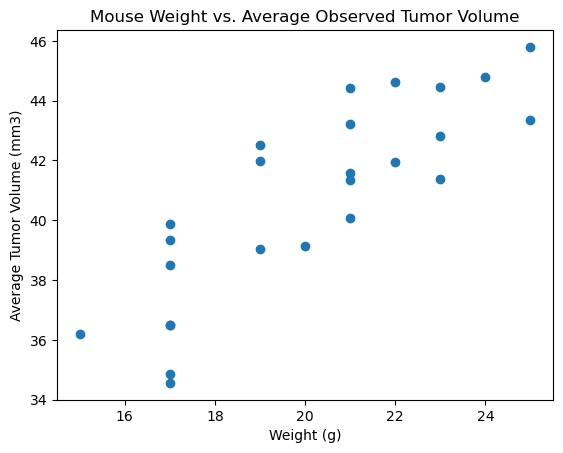

In [185]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug = merged_pd.loc[(merged_pd["Drug Regimen"] == "Capomulin")]

capomulin_df = drug.groupby(["Mouse ID"])


x_axis = capomulin_df["Weight (g)"].mean()
y_axis = capomulin_df["Tumor Volume (mm3)"].mean()

plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Observed Tumor Volume")

## Correlation and Regression

In [201]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_cof = round(st.pearsonr(x_axis, y_axis)[0],2)
print("The correlation coefficient between weight and tumor volume is ", correlation_cof)



The correlation coefficient between weight and tumor volume is  0.84
